1. [Import libraries required for analysis](#eda_import)
2. [Load Dataset](#eda_load)
3. [Create model with Classifier](#eda_model)
4. [Explore model with RandomizedSearchCV](#eda_random)
5. [Explore model with Optuna](#eda_optuna)
6. [Explore model with GridSearchCV](#eda_grid)

<a name = "eda_import"></a>Libraries required for analysis

In [1]:

!pip install seaborn --upgrade

!pip install cmake

!pip install xgboost

!pip install scikit-learn

!pip install imblearn

!pip install graphviz

!pip install optuna

!pip install statsmodels --upgrade.

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.12.2)

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --upgrade.


In [2]:
##import libraries required for analysis

import pandas as pd
import numpy as np
import os
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import mpl_toolkits.mplot3d
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, fbeta_score, roc_auc_score
from collections import Counter
from sklearn.model_selection import  cross_val_score
from sklearn import svm
import psycopg2
import sqlalchemy
import getpass
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import mpl_toolkits.mplot3d
from sklearn.impute import KNNImputer
from sklearn.ensemble import IsolationForest
from scipy.stats import pearsonr
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from xgboost import plot_tree
import optuna
from sklearn.metrics import plot_roc_curve,  roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

<a name = "eda_load"></a>Load Dataset

In [3]:
#load dataset
file_path = "/dsa/groups/casestudy2023su/team03/Data4/mros_merged.csv"
merged_df = pd.read_csv(file_path)
merged_df.columns = merged_df.columns.str.upper()
merged_df.head()

,B1TRD,B1ITD,B1FND,B1WDD,B1THD,B1L1D,B1L2D,B1L3D,B1L4D,B1TLD,...,RADIALPULSE_AVG,AVGHEIGHT_CM,BMI,HEIGHTCHANGEFROM25,WEIGHTCHANGEFROM25,GIEDUC,GIERACE,GISOC,GIAGE1,FAFXNT_BIN
0,0.816111,1.22431,0.867423,0.784696,1.046450,1.135320,1.17017,1.244590,1.308290,1.219140,...,53.0,172.75,29.4211,-0.03,10.68970,7. Some Grad,1. WHITE,11. Management,67.0,0
1,0.879885,1.11591,0.740235,0.519868,0.977156,1.233880,1.26274,1.194060,1.192260,1.218600,...,61.0,176.60,31.8717,6.28,20.02170,7. Some Grad,1. WHITE,11. Management,67.0,0
2,0.690143,1.12294,0.691843,0.505692,0.938607,0.745454,0.88662,0.964876,0.944702,0.891893,...,74.0,178.45,26.0956,4.43,3.72175,5. Some College,1. WHITE,43. Office and Administrative Support,72.0,1
3,0.854573,1.14140,0.878307,0.648614,1.017220,1.169730,1.31559,1.261980,1.220290,1.241840,...,71.0,184.65,28.5667,3.31,36.16540,7. Some Grad,1. WHITE,11. Management,65.0,1
4,0.894594,1.25773,0.919494,0.585505,1.104740,1.036480,1.22224,1.176640,1.245910,1.173820,...,63.0,168.75,29.1117,-18.89,17.12940,5. Some College,1. WHITE,13. Business and Financial,78.0,0


In [4]:
#load training and validation sets
file_path = "/dsa/groups/casestudy2023su/team03/Data4/X_train.csv"
X_train = pd.read_csv(file_path)
X_train.columns = X_train.columns.str.upper()
X_train.head()

,INDEX,NPHIPREP,NPSEAT,NPLFST,NPLEFT1,NPRIGHT6,MHDIAB,MHHTHY,MHHTHYT,MHLTHY,...,GISOC_39PERSONALCAREANDSERVICE,GISOC_41SALESANDRELATED,GISOC_43OFFICEANDADMINISTRATIVESUPPORT,GISOC_45FARMINGFISHINGANDFORESTRY,GISOC_47CONSTRUCTIONANDEXTRACTION,GISOC_49INSTALLATIONMAINTENANCEANDREPAIR,GISOC_51PRODUCTION,GISOC_53TRANSPORTATIONANDMATERIALMOVING,GISOC_55MILITARYSPECIFIC,BMD_PCA
0,2894,0.0,107.0,0.0,181.6,272.6,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,4.866068
1,5960,0.0,94.5,0.0,206.4,265.1,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.202046
2,1965,0.0,82.2,0.0,178.7,234.2,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,2.375249
3,829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.497068
4,2348,0.0,94.0,0.0,174.6,223.3,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,-5.488996


In [5]:
file_path = "/dsa/groups/casestudy2023su/team03/Data4/y_train.csv"
y_train = pd.read_csv(file_path)
y_train.columns = y_train.columns.str.upper()
y_train.head()

,FAFXNT_BIN
0,0
1,0
2,0
3,1
4,0


In [6]:
file_path = "/dsa/groups/casestudy2023su/team03/Data4/X_validation.csv"
X_validation = pd.read_csv(file_path)
X_validation.columns = X_validation.columns.str.upper()
X_validation.head()

,INDEX,NPHIPREP,NPSEAT,NPLFST,NPLEFT1,NPRIGHT6,MHDIAB,MHHTHY,MHHTHYT,MHLTHY,...,GISOC_39PERSONALCAREANDSERVICE,GISOC_41SALESANDRELATED,GISOC_43OFFICEANDADMINISTRATIVESUPPORT,GISOC_45FARMINGFISHINGANDFORESTRY,GISOC_47CONSTRUCTIONANDEXTRACTION,GISOC_49INSTALLATIONMAINTENANCEANDREPAIR,GISOC_51PRODUCTION,GISOC_53TRANSPORTATIONANDMATERIALMOVING,GISOC_55MILITARYSPECIFIC,BMD_PCA
0,3523,0.0,112.0,0.0,226.7,287.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0.210191
1,2333,0.0,110.4,0.0,83.6,139.3,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-2.791764
2,3129,0.0,102.5,0.0,208.2,244.7,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,5.027655
3,2718,0.0,93.5,0.0,189.1,218.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1.059758
4,5069,0.0,108.3,0.0,137.5,153.4,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,-0.500002


In [7]:
file_path = "/dsa/groups/casestudy2023su/team03/Data4/y_validation.csv"
y_validation = pd.read_csv(file_path)
y_validation.columns = y_validation.columns.str.upper()
y_validation.head()

,FAFXNT_BIN
0,0
1,0
2,0
3,1
4,1


In [8]:
sm = SMOTE(random_state=42)
X_smo, y_smo = sm.fit_resample(X_train, y_train)
scaler = StandardScaler()
#X_smo_scaled = scaler.fit_transform(X_smo)


In [9]:

print(merged_df.shape)
print(X_smo.shape)
print(X_train.shape)
print(y_train.shape)# Training and evaluation

print(X_validation.shape)
print(y_validation.shape)

(5994, 381)
(7528, 292)
(7528, 292)
(7528, 1)
(600, 292)
(600, 1)


<a name = "eda_model"></a>Create Model with XGBClassifier

In [10]:
#create classifier model with optimized hyperparameters and fit model
xgb_mode11 = XGBClassifier(cv=5)
xgb_mode11.fit(X_smo, y_train)
print(xgb_mode11.score(X_validation, y_validation))
y_pred = xgb_mode11.predict(X_validation)
print(confusion_matrix(y_validation, xgb_mode11.predict(X_validation)))

xgb_model2 = XGBClassifier(eta = 0.8, cv=5)
xgb_model2.fit(X_smo, y_train)
print(xgb_model2.score(X_validation, y_validation))
y_pred = xgb_model2.predict(X_validation)
print(confusion_matrix(y_validation, xgb_model2.predict(X_validation)))

xgb_model3 = XGBClassifier(eta = 0.8, min_child_weight = 2, cv=5)
xgb_model3.fit(X_smo, y_train)
print(xgb_model3.score(X_validation, y_validation))
y_pred = xgb_model3.predict(X_validation)
print(confusion_matrix(y_validation, xgb_model3.predict(X_validation)))

xgb_model4 = XGBClassifier(eta = 0.8, min_child_weight = 2,  max_depth = 4, cv=5)
xgb_model4.fit(X_smo, y_train)
print(xgb_model4.score(X_validation, y_validation))
y_pred = xgb_model4.predict(X_validation)
print(confusion_matrix(y_validation, xgb_model4.predict(X_validation)))

xgb_model5 = XGBClassifier(eta = 0.8, min_child_weight = 2,  max_depth = 4, scale_pos_weight = 4, cv=5)
xgb_model5.fit(X_smo, y_train)
print(xgb_model5.score(X_validation, y_validation))
y_pred = xgb_model5.predict(X_validation)
print(confusion_matrix(y_validation, xgb_model5.predict(X_validation)))

#xgb_model6 =XGBClassifier(eta = 0.8, min_child_weight = 2,  max_depth = 4, scale_pos_weight = 4, 
#                          objective = 'multi:softprob', num_class = 4)
#xgb_model6.fit(X_smo, y_train)
#print(xgb_model6.score(X_validation, y_validation))
#y_pred = xgb_model6.predict(X_validation)
#print(confusion_matrix(y_validation, xgb_model6.predict(X_validation)))

xgb_model6 =XGBClassifier(eta = 0.2, min_child_weight = 0.2,  max_depth = 11, 
                          seed = 131, cv=5)
xgb_model6.fit(X_smo, y_train)
print(xgb_model6.score(X_validation, y_validation))
y_pred = xgb_model6.predict(X_validation)
print(confusion_matrix(y_validation, xgb_model6.predict(X_validation)))

[12:47:44] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.7683333333333333
[[446  26]
 [113  15]]
[12:47:47] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.75
[[434  38]
 [112  16]]
[12:47:50] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/

<a name = "eda_random"></a>RandomizedSearchCV

In [11]:
#Define functions for RandomizedSearch
params = {
    'eta':[0.1, 0.2, 0.3], 
    'min_child_weight':[0.2, 0.3, 0.4],
    'max_depth':[10, 12, 14],
    'seed':[120, 130, 140]
}
random_search = RandomizedSearchCV(estimator=xgb_model6, param_distributions=params, n_iter=10, scoring='accuracy', 
                                   cv=3, random_state=42)   
random_search.fit(X_smo, y_train)

# Get the best model and its hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_validation)




[12:48:04] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:07] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:48:11] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This c

[12:49:23] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:49:28] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:49:30] WARNING: /tmp/pip-install-822s16yf/xgboost/build/temp.linux-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "cv" } might not be used.

  This c

In [29]:
# Evaluate the model's performance
accuracyrandom = best_model.score(X_validation, y_validation)
print(accuracyrandom)
print(classification_report(y_validation, y_pred)) 


0.775
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       472
           1       0.33      0.05      0.09       128

    accuracy                           0.78       600
   macro avg       0.56      0.51      0.48       600
weighted avg       0.69      0.78      0.71       600



In [13]:
#random_search.cv_results_

In [14]:
print(confusion_matrix(y_validation, y_pred))

[[458  14]
 [121   7]]


In [15]:
#review optimal parameters
cv = pd.concat([pd.DataFrame(random_search.cv_results_["params"]),pd.DataFrame(random_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
cv

,seed,min_child_weight,max_depth,eta,Accuracy
0,120,0.3,10,0.2,0.835181
1,120,0.2,10,0.1,0.834650
2,130,0.3,14,0.1,0.832391
3,130,0.3,10,0.2,0.835181
4,120,0.2,14,0.1,0.837174
5,130,0.2,10,0.2,0.834650
6,130,0.2,12,0.1,0.834916
7,130,0.4,12,0.3,0.833986
8,130,0.3,10,0.1,0.835181
9,120,0.3,12,0.1,0.832790


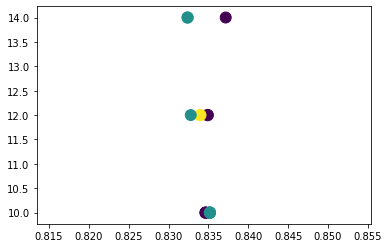

In [16]:
#visualize optimal parameters
plt.scatter(cv.Accuracy, cv.max_depth, s=cv.seed, c=cv.min_child_weight)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


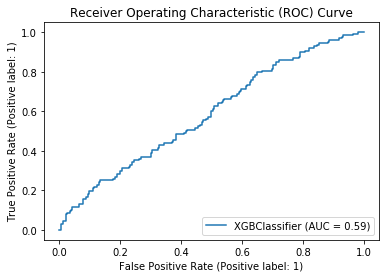

In [17]:
#plot ROC Curve
results = pd.DataFrame(random_search.cv_results_)[['params']]
plot_roc_curve(xgb_model6, X_validation, y_validation)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()
#print(results)

<a name = "eda_optuna"></a>Optuna

[I 2023-07-16 12:50:11,522] A new study created in memory with name: no-name-42f01a65-7d5c-4d03-935b-eae9c0f39015
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/pyt

[I 2023-07-16 12:50:27,416] Trial 4 finished with value: 0.6496788930084746 and parameters: {'eta': 0.005439090072131603, 'max_depth': 7, 'subsample': 0.8186708528738164, 'colsample_bytree': 0.8084890175669812, 'alpha': 6.267856547228687, 'lambda': 9.800449998600016, 'min_child_weight': 5}. Best is trial 1 with value: 0.652542372881356.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform has

[I 2023-07-16 12:50:42,963] Trial 9 finished with value: 0.6452760858050848 and parameters: {'eta': 0.0018935784708520662, 'max_depth': 9, 'subsample': 0.6325860000097843, 'colsample_bytree': 0.6786901165536476, 'alpha': 8.615105020171871, 'lambda': 0.9410387291023714, 'min_child_weight': 6}. Best is trial 1 with value: 0.652542372881356.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:51:07,651] Trial 14 finished with value: 0.6613645391949152 and parameters: {'eta': 0.03476958661016107, 'max_depth': 8, 'subsample': 0.5649210054708266, 'colsample_bytree': 0.8301303321249742, 'alpha': 7.445273809810033, 'lambda': 2.664464305882701, 'min_child_weight': 4}. Best is trial 14 with value: 0.6613645391949152.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:51:25,549] Trial 19 finished with value: 0.6650225105932204 and parameters: {'eta': 0.015273407780296554, 'max_depth': 8, 'subsample': 0.7605490037411919, 'colsample_bytree': 0.8235171491715471, 'alpha': 8.841766635870385, 'lambda': 1.3321119499923615, 'min_child_weight': 4}. Best is trial 19 with value: 0.6650225105932204.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform

[I 2023-07-16 12:51:43,913] Trial 24 finished with value: 0.6505892478813559 and parameters: {'eta': 0.01927321226306205, 'max_depth': 6, 'subsample': 0.6796522337980115, 'colsample_bytree': 0.7816300929753648, 'alpha': 7.712504284318209, 'lambda': 1.0674172240718711, 'min_child_weight': 2}. Best is trial 19 with value: 0.6650225105932204.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform 

[I 2023-07-16 12:52:00,300] Trial 29 finished with value: 0.6497285487288136 and parameters: {'eta': 0.014742943908963604, 'max_depth': 7, 'subsample': 0.8507412064027218, 'colsample_bytree': 0.7474338002869861, 'alpha': 6.201935282683686, 'lambda': 0.7000531617565677, 'min_child_weight': 5}. Best is trial 19 with value: 0.6650225105932204.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform

[I 2023-07-16 12:52:16,504] Trial 34 finished with value: 0.6585838188559323 and parameters: {'eta': 0.037990454920169836, 'max_depth': 7, 'subsample': 0.7310237230218656, 'colsample_bytree': 0.7824347198113539, 'alpha': 7.785306569881586, 'lambda': 2.9484143768351703, 'min_child_weight': 2}. Best is trial 30 with value: 0.6703025688559323.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform

[I 2023-07-16 12:52:25,491] Trial 39 finished with value: 0.6752350370762713 and parameters: {'eta': 0.05084219980807566, 'max_depth': 4, 'subsample': 0.8065651322440888, 'colsample_bytree': 0.7142255234143836, 'alpha': 8.952051072549661, 'lambda': 2.220571792270283, 'min_child_weight': 3}. Best is trial 39 with value: 0.6752350370762713.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:52:35,295] Trial 44 finished with value: 0.6519630561440679 and parameters: {'eta': 0.09788497984485049, 'max_depth': 4, 'subsample': 0.7968347090965527, 'colsample_bytree': 0.696151940154876, 'alpha': 9.997689363318996, 'lambda': 4.27987393741409, 'min_child_weight': 2}. Best is trial 39 with value: 0.6752350370762713.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform has

[I 2023-07-16 12:52:44,397] Trial 49 finished with value: 0.654296875 and parameters: {'eta': 0.03392541824330886, 'max_depth': 3, 'subsample': 0.7798693833999377, 'colsample_bytree': 0.7585728474447802, 'alpha': 9.929884094888473, 'lambda': 5.118471360918944, 'min_child_weight': 4}. Best is trial 48 with value: 0.6767743644067797.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform has been

[I 2023-07-16 12:52:54,637] Trial 54 finished with value: 0.6605865995762712 and parameters: {'eta': 0.06881488656264692, 'max_depth': 4, 'subsample': 0.8530149499822016, 'colsample_bytree': 0.7310363712138989, 'alpha': 8.707899858157473, 'lambda': 5.211131879331032, 'min_child_weight': 3}. Best is trial 48 with value: 0.6767743644067797.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:53:06,147] Trial 59 finished with value: 0.6731826006355932 and parameters: {'eta': 0.04422860993632499, 'max_depth': 5, 'subsample': 0.8367767895619005, 'colsample_bytree': 0.7948578036803025, 'alpha': 9.169557644743424, 'lambda': 5.708501210618992, 'min_child_weight': 4}. Best is trial 48 with value: 0.6767743644067797.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:53:20,009] Trial 64 finished with value: 0.6705839512711864 and parameters: {'eta': 0.04305017043425813, 'max_depth': 6, 'subsample': 0.8130275708885895, 'colsample_bytree': 0.7951168183813406, 'alpha': 8.989556635561966, 'lambda': 6.741993785693987, 'min_child_weight': 1}. Best is trial 62 with value: 0.6773205773305084.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:53:33,611] Trial 69 finished with value: 0.6717094809322034 and parameters: {'eta': 0.04611192646461446, 'max_depth': 6, 'subsample': 0.7494990170076942, 'colsample_bytree': 0.7916160343617789, 'alpha': 9.756215199871482, 'lambda': 5.412736543534219, 'min_child_weight': 2}. Best is trial 62 with value: 0.6773205773305084.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:53:43,508] Trial 74 finished with value: 0.6647742319915254 and parameters: {'eta': 0.028925869007839774, 'max_depth': 4, 'subsample': 0.8104727681777334, 'colsample_bytree': 0.7111888656616273, 'alpha': 9.696842016309045, 'lambda': 3.8405791198399113, 'min_child_weight': 3}. Best is trial 62 with value: 0.6773205773305084.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform

[I 2023-07-16 12:53:53,553] Trial 79 finished with value: 0.6762778072033899 and parameters: {'eta': 0.047472027471318554, 'max_depth': 4, 'subsample': 0.7572696159463529, 'colsample_bytree': 0.6856693880063937, 'alpha': 8.551117873316652, 'lambda': 5.08814719491166, 'min_child_weight': 5}. Best is trial 78 with value: 0.6786943855932203.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform h

[I 2023-07-16 12:54:02,674] Trial 84 finished with value: 0.6577065677966101 and parameters: {'eta': 0.06719000996624416, 'max_depth': 4, 'subsample': 0.7864063119413592, 'colsample_bytree': 0.684824314206125, 'alpha': 9.641226064024082, 'lambda': 5.064563977600195, 'min_child_weight': 5}. Best is trial 78 with value: 0.6786943855932203.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform ha

[I 2023-07-16 12:54:13,582] Trial 89 finished with value: 0.6635493908898304 and parameters: {'eta': 0.05197721610533441, 'max_depth': 5, 'subsample': 0.7866313125455682, 'colsample_bytree': 0.7545090777239302, 'alpha': 8.897750806359593, 'lambda': 5.9411840380818814, 'min_child_weight': 4}. Best is trial 78 with value: 0.6786943855932203.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform 

[I 2023-07-16 12:54:23,366] Trial 94 finished with value: 0.6753177966101694 and parameters: {'eta': 0.03716858349725927, 'max_depth': 4, 'subsample': 0.759106128893294, 'colsample_bytree': 0.7764885888769586, 'alpha': 8.508591348169162, 'lambda': 5.058356359492152, 'min_child_weight': 4}. Best is trial 78 with value: 0.6786943855932203.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: suggest_uniform ha

[I 2023-07-16 12:54:34,021] Trial 99 finished with value: 0.6746557203389829 and parameters: {'eta': 0.032558543967229576, 'max_depth': 5, 'subsample': 0.7894004711257818, 'colsample_bytree': 0.8006664651847487, 'alpha': 7.84638963856648, 'lambda': 5.232131053081458, 'min_child_weight': 4}. Best is trial 78 with value: 0.6786943855932203.


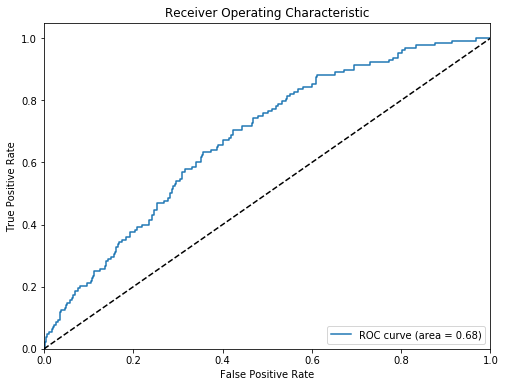

In [18]:
#define functions for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'eta': trial.suggest_loguniform('eta', 1e-3, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
        'alpha': trial.suggest_uniform('alpha', 0, 10),
        'lambda': trial.suggest_uniform('lambda', 0, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    # Train the model
    model = xgb.XGBClassifier(**param)
    model.fit(X_smo, y_train)

    # Predict probabilities on the test set
    y_pred_proba = model.predict_proba(X_validation)[:, 1]

    # Calculate ROC AUC
    fpr, tpr, thresholds = roc_curve(y_validation, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    return roc_auc

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params

# Train the final model with the best hyperparameters
final_model = xgb.XGBClassifier(**best_params)
final_model.fit(X_smo, y_train)

# Predict probabilities on the test set using the final model
y_pred_probaf = final_model.predict_proba(X_validation)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_validation, y_pred_probaf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


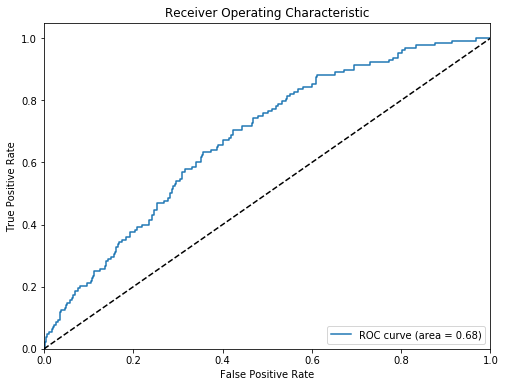

In [19]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
#print(classification_report(y_validation, y_pred_probaf)) 

In [21]:
#print(confusion_matrix(y_validation, y_pred_probaf))

In [22]:
y_validation.dtypes

FAFXNT_BIN    int64
dtype: object

In [23]:

#plot_roc_curve(model, X_validation, y_validation)
#plt.title('Receiver Operating Characteristic (ROC) Curve')
#plt.show()

<a name = "eda_grid"></a>GridSearchCV

In [24]:
#Define functions for Gridsearch
params = {
    'eta':[0.1, 0.2, 0.3], 
    'min_child_weight':[0.2, 0.3, 0.4],
    'max_depth':[10, 12, 14],
    'seed':[120, 130, 140]
}
grid_search = GridSearchCV(estimator = XGBClassifier(), param_grid = params, cv=3)   
grid_search.fit(X_smo, y_train)

# Get the best model and its hyperparameters
bestgrid_model = grid_search.best_estimator_
bestgrid_params = grid_search.best_params_

# Make predictions on the test data using the best model
ygrid_pred = bestgrid_model.predict(X_validation)

 

In [25]:
# Evaluate the model's performance
accuracygrid = bestgrid_model.score(X_validation, y_validation)
print(classification_report(y_validation, ygrid_pred)) 
print(accuracygrid)

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       472
           1       0.50      0.05      0.09       128

    accuracy                           0.79       600
   macro avg       0.65      0.52      0.48       600
weighted avg       0.73      0.79      0.71       600

0.7866666666666666


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


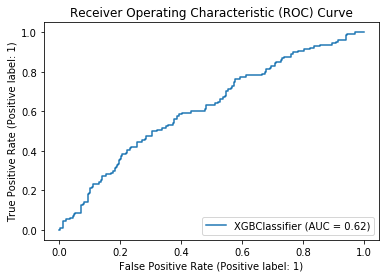

In [26]:
# Plot the ROC curve
plot_roc_curve(bestgrid_model, X_validation, y_validation)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [27]:
print(confusion_matrix(y_validation, ygrid_pred))

[[466   6]
 [122   6]]
